### 라이브러리 import

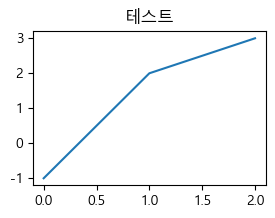

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

pd.Series([-1,2,3]).plot(title='테스트', figsize=(3,2))
pass


### 데이터 준비

* 기상데이터 전체 불러오기

In [92]:
# --------------------------
# 기상데이터 전체 불러오기
# --------------------------

file_path = 'C:/workspace/python/데이터분석/data/기상데이터_전체.csv'
df_all = pd.read_csv(file_path, parse_dates=['일시'])
df_all.head()

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),1시간 최다강수량(mm),일강수량(mm),연도,월
0,108,서울,1907-10-01,13.5,7.9,20.7,NaN,NaN,1907,10
1,108,서울,1907-10-02,16.2,7.9,22.0,NaN,0.2,1907,10
2,108,서울,1907-10-03,16.2,13.1,21.3,NaN,2.4,1907,10
3,108,서울,1907-10-04,16.5,11.2,22.0,NaN,NaN,1907,10
4,108,서울,1907-10-05,17.6,10.9,25.4,NaN,NaN,1907,10


* 지점정보 불러오기

In [93]:
# --------------------------
# 지점정보 불러오기
# --------------------------

file_path = 'C:/workspace/python/데이터분석/data/기상데이터_지점정보.csv'
df_location = pd.read_csv(file_path)
df_location.head()

,지점,지점명,데이터수,시작년도,끝년도
0,90,속초,20910,1968,2025
1,93,북춘천,3104,2016,2025
2,95,철원,13605,1988,2025
3,98,동두천,9952,1998,2025
4,99,파주,8490,2002,2025


## 지점선택

In [94]:
# --------------------------
# 분석할 지점 선택
# --------------------------

# 지점 입력받기
location_name = input('지점명을 입력하세요:')

# 지점정보 확인
cond = df_location['지점명']==location_name
df_location.loc[cond]

,지점,지점명,데이터수,시작년도,끝년도
2,95,철원,13605,1988,2025


## 전처리

* 지점의 강수량 데이터

In [95]:
# -------------------
# 선택한 지점의 일강수량(mm) 데이터 선택
# 일시 컬럼을 인덱스로 설정(DatetimeIndex)
# -------------------
cond = df_all['지점명']==location_name

df_selected = \
    df_all.loc[cond, ['일시', '지점명', '일강수량(mm)']]\
    .set_index('일시')
df_selected.head(10)

,지점명,일강수량(mm)
일시,,
1988-01-01,철원,0.4
1988-01-02,철원,NaN
1988-01-03,철원,NaN
1988-01-04,철원,NaN
1988-01-05,철원,NaN
1988-01-06,철원,NaN
1988-01-07,철원,0.0
1988-01-08,철원,1.9
1988-01-09,철원,NaN


In [96]:
# -------------------
# 강수여부 컬럼 생성
# 조건1. 강수량(mm)이 null이 아님
# 조건2. 일강수량(mm)이 0보다 커야 함함
# -------------------

cond1 = df_selected['일강수량(mm)'].notnull()
cond2 = df_selected['일강수량(mm)']>0

df_selected['강수여부'] = cond1&cond2
df_selected.sample(5)

,지점명,일강수량(mm),강수여부
일시,,,
2007-04-21,철원,0.5,True
2001-08-17,철원,NaN,False
1995-06-30,철원,1.8,True
2010-07-30,철원,0.5,True
2017-06-02,철원,NaN,False


In [97]:
# -------------------
# 전날 강수여부 컬럼 생성
# -------------------

df_selected['전날강수여부'] = df_selected['강수여부'].shift(1)
df_selected.head(10)

,지점명,일강수량(mm),강수여부,전날강수여부
일시,,,,
1988-01-01,철원,0.4,True,NaN
1988-01-02,철원,NaN,False,True
1988-01-03,철원,NaN,False,False
1988-01-04,철원,NaN,False,False
1988-01-05,철원,NaN,False,False
1988-01-06,철원,NaN,False,False
1988-01-07,철원,0.0,False,False
1988-01-08,철원,1.9,True,False
1988-01-09,철원,NaN,False,True


In [98]:
# -------------------
# 강수상태 변화 컬럼 추가
# -------------------
df_selected['강수상태변화'] = df_selected['강수여부'] != df_selected['전날강수여부']
df_selected.head(10)

,지점명,일강수량(mm),강수여부,전날강수여부,강수상태변화
일시,,,,,
1988-01-01,철원,0.4,True,NaN,True
1988-01-02,철원,NaN,False,True,True
1988-01-03,철원,NaN,False,False,False
1988-01-04,철원,NaN,False,False,False
1988-01-05,철원,NaN,False,False,False
1988-01-06,철원,NaN,False,False,False
1988-01-07,철원,0.0,False,False,False
1988-01-08,철원,1.9,True,False,True
1988-01-09,철원,NaN,False,True,True


In [99]:
# -------------------
# 그룹 식별
# -------------------
df_selected['그룹'] = df_selected['강수상태변화'].cumsum()

df_selected['2024-07':].head(20)


,지점명,일강수량(mm),강수여부,전날강수여부,강수상태변화,그룹
일시,,,,,,
2024-07-01,철원,NaN,False,True,True,4164
2024-07-02,철원,37.8,True,False,True,4165
2024-07-03,철원,3.0,True,True,False,4165
2024-07-04,철원,7.8,True,True,False,4165
2024-07-05,철원,5.3,True,True,False,4165
2024-07-06,철원,9.5,True,True,False,4165
2024-07-07,철원,2.9,True,True,False,4165
2024-07-08,철원,13.5,True,True,False,4165
2024-07-09,철원,4.2,True,True,False,4165


In [100]:
# -------------------
# 비가 내린 날만 필터링
# -------------------

df_selected = df_selected[df_selected['강수여부']]
df_selected.head(10)

,지점명,일강수량(mm),강수여부,전날강수여부,강수상태변화,그룹
일시,,,,,,
1988-01-01,철원,0.4,True,NaN,True,1
1988-01-08,철원,1.9,True,False,True,3
1988-01-13,철원,0.4,True,False,True,5
1988-01-21,철원,0.8,True,False,True,7
1988-01-22,철원,1.8,True,True,False,7
1988-01-28,철원,0.5,True,False,True,9
1988-02-01,철원,0.8,True,False,True,11
1988-02-04,철원,1.9,True,False,True,13
1988-02-05,철원,1.4,True,True,False,13


In [101]:
# -------------------
# 그룹별 분석을 위해 인덱스를 컬럼으로 만들기
# -------------------

df_selected.reset_index( inplace=True)


In [102]:
# -------------------
# 그룹별 강수 시작일, 종료일, 지속일수 집계
# -------------------

df_result = df_selected.groupby('그룹')['일시'].agg(['min', 'max', 'count'])
df_result.columns = ['시작일', '종료일', '지속일수']
df_result.head()


,시작일,종료일,지속일수
그룹,,,
1,1988-01-01,1988-01-01,1
3,1988-01-08,1988-01-08,1
5,1988-01-13,1988-01-13,1
7,1988-01-21,1988-01-22,2
9,1988-01-28,1988-01-28,1


In [103]:
# ----------------
# 연도 컬럼 생성
# ----------------

df_result['연도'] = df_result['시작일'].dt.year
df_result.sample(5)


,시작일,종료일,지속일수,연도
그룹,,,,
2571,2009-12-05,2009-12-05,1,2009
1953,2004-10-12,2004-10-13,2,2004
2083,2005-11-28,2005-11-29,2,2005
137,1989-06-18,1989-06-18,1,1989
989,1996-06-16,1996-06-18,3,1996


## 분석

### 연도별 최장 강우일수 top10

In [104]:
# ----------------
# 지속일수 기준 내림차순 정렬
# 연도별 첫번째 데이터
# ----------------

df_result \
    = df_result.sort_values('지속일수', ascending=False)\
    .groupby('연도').first()

df_result.sort_values('지속일수', ascending=False).head()

,시작일,종료일,지속일수
연도,,,
1998,1998-08-03,1998-08-19,17
2007,2007-08-01,2007-08-16,16
1990,1990-07-14,1990-07-27,14
2022,2022-07-30,2022-08-11,13
2010,2010-08-22,2010-09-03,13


## 시각화

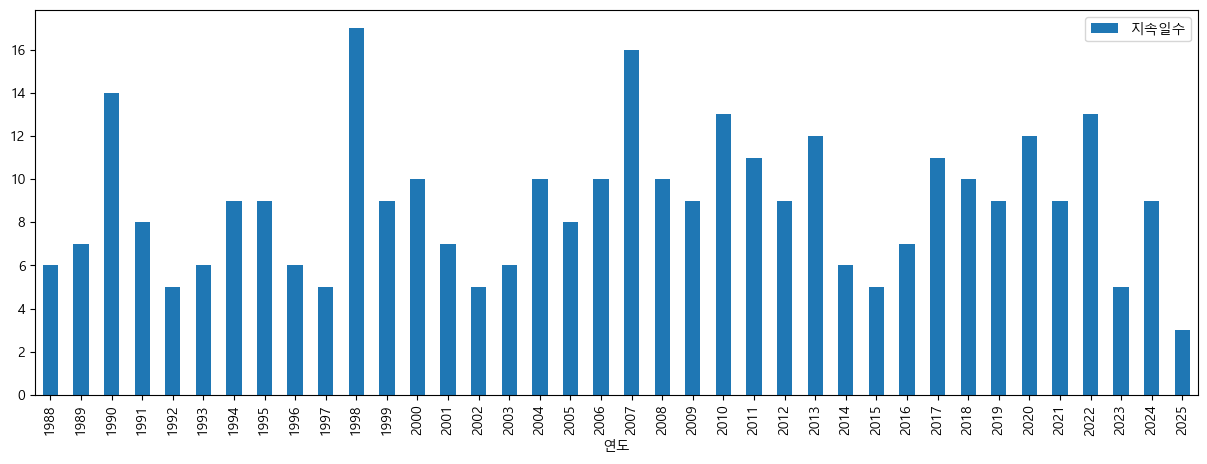

In [105]:
df_result.plot(kind='bar', y='지속일수',
               figsize=(15,5));

In [106]:
df_result['지속일수'].mean()

np.float64(8.842105263157896)